<a href="https://colab.research.google.com/github/diegormsouza/NWF-Python-Jul-2021/blob/main/Curso_NWF_202107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CURSO: PROCESSAMENTO DE DADOS DE MODELO NUMÉRICO COM PYTHON** 
INPE / CGCT / DISSM

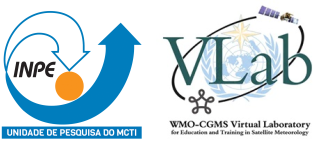

### **Contato:** Diego Souza - INPE / CGCT / DISSM - (diego.souza@inpe.br)

# Introdução

Bem vindos ao curso **"Processamento de Dados de Modelo com Python"**! 


---


Este "notebook" interativo contém instruções para a instalação das ferramentas necessárias para a criação de scripts Python para a manipulação dos dados mostrados no curso. Todas as instruções e scripts são executados na nuvem, não sendo necessário instalar as ferramentas e baixar arquivos localmente. Para executar as instruções, clicar no ícone "Play" entre colchetes à esquerda de cada célula.

# 1° Passo: Verificações Preliminares

Neste passo verificamos a configuração da máquina e a versão Python instalada. 

In [ ]:
# Verificando configuração da máquina
!cat /etc/issue
!uname -a
print('\n')

# Verificando a memória
!grep MemTotal /proc/meminfo
print('\n')

# Verificando o HD
!df -h
print('\n')

# Verificando qual o diretório da instalação padrão do Python
!which python
print('\n')

# Verificando qual a versão instalada do Python
!python --version
print('\n')

# 2° Passo: Instalando as Bibliotecas Necessárias

Neste passo instalamos as bibliotecas necessárias para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **Pygrib:** Ler os dados de modelo
*   **Cartopy:** Adicionar mapas aos plots
*   **MetPy:** Adicionar dados METAR
*   **Boto3:** Baixar dados de satélite da nuvem 
*   **NetCDF4:** Ler os dados de satélite
*   **GDAL:** Reprojetar os dados de satélite para a mesma projeção dos dados de modelo


In [ ]:
# Instalando a Biblioteca Pygrib
!pip install pygrib

# Instalando a Biblioteca Cartopy
!pip install cartopy
!pip install shapely --no-binary shapely --force

# Instalando a Biblioteca MetPy
!pip install MetPy

# Instalando a Biblioteca Boto3
!pip install boto3

# Instalando a Biblioteca NetCDF4
!pip install netcdf4

# Instalando / atualizando a Biblioteca GDAL
!apt-add-repository -y ppa:ubuntugis/ubuntugis-unstable
!add-apt-repository -y ppa:ubuntugis/ppa
!apt-get install gdal-bin
!pip install 'gdal==3.0.4'

Neste ponto nossas bibliotecas estão instaladas e estamos prontos para iniciar o desenvolvimento dos scripts!

# Script Inicial: Download de Dados GFS do Servidor *NOMADS*

Nesse script Python inicial, vamos baixar dados diretamente do servidor NOMADS, da NOAA. Nesse script, a data para download (variável "date") está como o dia de hoje, mas pode ser modificada para os 10 últimos dias (formato "YYYYMMDD"). Você também pode escolher a região desejada nas variáveis de lat e lon, a resolução e a rodada desejada. Por último é possível escolher o intervalo de dados, com as variáveis "hour_init" (hora inicial), "hour_end" (hora final) e "hour_inc" (incremento). Ao executar o script, os arquivos serão guardados na pasta "Output", criada no próprio script.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWF Data Processing With Python - Script 0: NWF Download with Python (GFS)
#-----------------------------------------------------------------------------------------------------------
# Required modules
from datetime import datetime        # Basic Dates and time types
import os                            # Miscellaneous operating system interfaces
import requests                      # HTTP library for Python
import time as t                     # Time access and conversion                                          
#-----------------------------------------------------------------------------------------------------------

# Start the time counter
print('\n------------------------------')
print('\nGFS Download - Script started.')
print('\n------------------------------')
start_time = t.time()  

#-----------------------------------------------------------------------------------------------------------

# Output directory
output = "Output"; os.makedirs(output, exist_ok=True)

# Desired date (last 10 days only!): Format - 'YYYYMMDD'
date = datetime.today().strftime('%Y%m%d')

# Desired extent
min_lon = '-93.00'
max_lon = '-25.00'
min_lat = '-60.00'
max_lat = '18.00'

# Desired resolution: '25' or '50' or '1'
resolution = '50' 

# Desired run: '00' or '06' or '12' or '18'
hour_run = '00'

# Desired forecast hours
hour_ini = 0  # Init time  
hour_end = 24  # End time
hour_inc = 3  # Increment

#-----------------------------------------------------------------------------------------------------------

# Link (select "grib filter" and check "Show the URL only for web programming" to verify the URL's):
# https://nomads.ncep.noaa.gov/

def download_gfs(date, iii):
    
    # Create the URL's based on the resolution    
    if (resolution == '25'):  
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos' 
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
    elif (resolution == '50'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p'+resolution+'.pl?file=gfs.t'+hour_run+'z.pgrb2full.0p'+resolution+'.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos' 
        file_name = 'gfs.t'+hour_run+'z.pgrb2.0p'+resolution+'.f'+str(hour).zfill(3)
    elif (resolution == '1'):
        url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_'+resolution+'p00.pl?file=gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)+'&all_lev=on&all_var=on&subregion=&leftlon='+min_lon+'&rightlon='+max_lon+'&toplat='+max_lat+'&bottomlat='+min_lat+'&dir=%2Fgfs.'+date+'%2F00%2Fatmos' 
        file_name = 'gfs.t'+hour_run+'z.pgrb2.'+resolution+'p00.f'+str(hour).zfill(3)
    
    # Sends a GET request to the specified url
    myfile = requests.get(url)
    
    # Download the file
    open(output + '//' + file_name, 'wb').write(myfile.content)

#-----------------------------------------------------------------------------------------------------------
    
# Download loop
for hour in range(hour_ini, hour_end + 1, hour_inc):
    print('\n---------------------')
    print('\nDownloading GFS File:')
    print('\n---------------------')
    print('\nResolution: ' + resolution)
    print('\nDate: ' + date)
    print('\nRun: ' + hour_run)
    print('\nForecast Hour: f' + str(hour).zfill(3))
    # Call the download function
    download_gfs(date,hour)

#-----------------------------------------------------------------------------------------------------------

# End the time counter
print('\nTotal Processing Time:', round((t.time() - start_time),2), 'seconds.') 

# Script 1: Conhecendo as Variáveis Disponíveis em um Arquivo

Neste script, vamos verificar quais são as variáveis disponíveis dentro de um dos arquivos baixados no script anterior. Conhecendo as variáveis, poderemos prosseguir com os demais scripts. As variáveis serão guardadas em um arquivo de texto, chamado "gfs_variables.txt" e também serão mostradas no terminal interativo.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC - Training: NWF Data Processing With Python - Script 1: Knowing the Available Variables
#-----------------------------------------------------------------------------------------------------------
# Required modules
from datetime import datetime        # Basic Dates and time types
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                     # Time access and conversion
#-----------------------------------------------------------------------------------------------------------

# Image path
path = ('Output/gfs.t00z.pgrb2.0p50.f000')

# Read the GRIB file
grib = pygrib.open(path)

# To print all the variables to a txt file
f = open("gfs_variables.txt", "w")
for variables in grib:
    # Put the variables in the txt file
    print(variables, file=f)
    # Print the variables in the terminal
    print(variables)
f.close()

# Script 2: Plot Básico



Uma vez que conhecemos as variáveis ("datasets") disponíveis no arquivo GRIB, vamos crirar um plot básico de uma destas variáveis (temperatura em 2 metros). O plot será salvo em uma imagem PNG e também será mostrado no terminal interativo.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 2: Basic Plot
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime        # Basic Dates and time types
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                     # Time access and conversion
import matplotlib.pyplot as plt      # Plotting library
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(7,7))
 
# Plot the image
plt.imshow(tmtmp, origin='lower', cmap='jet')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_2.png')

# Show the image
plt.show()

# Script 3: Metadados, Cálculo Básico, Paleta de Cores, Legenda e Título

Neste script vamos ler alguns dados do cabeçalho do arquivo, fazer um cálculo básico (de K para °C), e adicionar alguns itens ao nosso plot, como legenda e título.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 3: Basic Operation / Color Palettes / Colorbar / Title / Date
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime        # Basic Dates and time types
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                     # Time access and conversion
import matplotlib.pyplot as plt      # Plotting library
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Plot the image
plt.imshow(tmtmp, origin='lower', cmap='rainbow')

# Add a colorbar
plt.colorbar(label='2 m Temperature (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_3.png')

# Show the image
plt.show()

# Script 4: Adicionando Mapas com a Cartopy


Neste script vamos adicionar mapas utilizando a biblioteca Cartopy. Para isto, precisamos importar a biblioteca, definir a projeção "Plate Carree" (como a Cartopy chama a projeção cilindrica equidistante), definir a região e chamar as instruções que adicionam os mapas.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 4: Adding a Map with Cartopy 
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime        # Basic Dates and time types
import pygrib                        # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                     # Time access and conversion
import matplotlib.pyplot as plt      # Plotting library
import cartopy, cartopy.crs as ccrs  # Plot maps
import numpy as np                   # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_4.png')

# Show the image
plt.show()

# Script 5: Adicionando um Shapefile

Os mapas adicionados com a Cartopy são um tanto limitados. Existe a possibilidade de adicionar shapefiles com a Cartopy, como vamos ver neste script. Primeiro, vamos baixar ao nosso diretório de trabalho o shapefile dos estados do Brasil.

**Baixando um shapefile dos estados do site do IBGE:**

In [ ]:
# Baixando o shapefile
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip

# Descomprimindo o arquivo
!unzip br_unidades_da_federacao.zip

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 5: Adding a Shapefile 
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Plot the image
img = ax.imshow(tmtmp, origin='lower', extent=img_extent, vmin=-20, vmax=48, cmap='jet')

# Add a colorbar
plt.colorbar(img, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_5.png')

# Show the image
plt.show()

# Script 6: Plotando Contornos e "Labels"

Neste script vamos realizar o mesmo plot, porém utilizando contornos. Veremos como definir os limiares, intervalos, e configurar a aparência do nosso plot.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 6: Plotting Contours and Labels  
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, transform=ccrs.PlateCarree(), cmap='jet', levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_6.png')

# Show the image
plt.show()

# Script 7: Paletas de Cores Personalizadas

As "colormaps" padrão do Python, apesar de variadas, muitas vezes não são adequadas para uma determinada aplicação. Neste script vamos ver como criar uma paleta personalizada.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 7: Custom Color Palettes  
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", "#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_7.png')

# Show the image
plt.show()

# Script 8: Suavizando os Contornos

Neste script vemos como suavizar os contornos dos plots utilizando o comando "zoom" a biblioteca "scipy". Basicamente aumentamos o tamanho da array "x" vezes, realizando uma interpolação.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 8: Smoothing the Contours  
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the model field
grb = grib.select(name='2 metre temperature')[0]

# Get some information    
init  = str(grb.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(grb.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(grb.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(grb.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-60.0, -30.00, -40.00, -10.00]

# Read the data for a specific region
tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert to Celsius
tmtmp = tmtmp - 273.15

print("\nArray dimensions before smoothing:")
print(tmtmp.shape)

# To smooth the contours
import scipy.ndimage
tmtmp = scipy.ndimage.zoom(tmtmp, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

print("Array dimensions after smoothing:")
print(tmtmp.shape)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", "#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')

# Plot the contours
img1 = ax.contourf(lons, lats, tmtmp, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, tmtmp, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: 2 m Temperature' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_8.png')

# Show the image
plt.show()

# Script 9: Trabalhando com Diversos Arquivos (Máximos e Mínimos) e Plots Simultâneos

Neste script vamos aprender dois conceitos novos:
*   Como trabalhar com diversos arquivos no mesmo script
*   Como criar mais de um plot simultâneamente

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 9: Maximuns and Minimuns 
#-----------------------------------------------------------------------------------------------------------
import matplotlib
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Select the extent
extent = [-78.0, -40.00, -30.00, 12.00]
#-----------------------------------------------------------------------------------------------------------

# Read the GRIB file
path = "Output/gfs.t00z.pgrb2.0p50.f"

# Data you want to process
# (to process only the analisys, end and inc should be equal).
hour_ini = 0   # Init time  
hour_end = 24  # End time
hour_inc = 3   # Increment

for hour in range(hour_ini, hour_end + 1, hour_inc):

    grib = path + str(hour).zfill(3)
    
    # If the file exists
    if (os.path.exists(grib)):
        
        # Process the file
        print("\nProcessing file: ", grib)

        # Read the GRIB file
        grib = pygrib.open(grib)
        
        # Read the model field
        grb = grib.select(name='2 metre temperature')[0]

        # Get some information    
        init  = str(grb.analDate)      # Init date / time
        print('Init: ' + init + ' UTC')
        run   = str(grb.hour).zfill(2) # Run
        print('Run: ' + run + 'Z')
        ftime = str(grb.forecastTime)  # Forecast hour
        print('Forecast: +' + ftime)
        valid = str(grb.validDate)     # Valid date / time 
        print('Valid: ' + valid + ' UTC')

        # Read the data for a specific region
        tmtmp, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        # Convert to Celsius
        tmtmp = tmtmp - 273.15

        # To smooth the contours
        import scipy.ndimage
        tmtmp = scipy.ndimage.zoom(tmtmp, 3)
        lats = scipy.ndimage.zoom(lats, 3)
        lons = scipy.ndimage.zoom(lons, 3)

        # If it is the first cycle, create the arrays that will store the max and min values
        if (hour == hour_ini):
            tmtmp_max = np.full((tmtmp.shape[0],tmtmp.shape[1]),-9999)
            tmtmp_min = np.full((tmtmp.shape[0],tmtmp.shape[1]), 9999)

        # Keep the maximuns
        tmtmp_max = np.maximum(tmtmp,tmtmp_max)

        # Keep the minimuns
        tmtmp_min = np.minimum(tmtmp,tmtmp_min)

print("\nMin and Max values stored!")

Com os valores mínimos e máximos obtidos, podemos realizar os plots de ambas as variáveis (continue a execução do script, dando "Play" na célula abaixo)

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# Create a custom color palette 
colors = ["#d3d2d2", "#bcbcbc", "#969696", "#1464d2", "#1e6eeb", "#2882f0", "#3c96f5", "#50a5f5", "#78b9fa", "#96d2fa", "#b4f0fa", "#1eb41e", "#37d23c", "#50f050", "#78f573", "#96f58c", "#b4faaa", "#c8ffbe", "#ffe878", "#ffc03c", "#ffa000", "#ff6000", "#ff3200", "#e11400", "#c00000", "#a50000", "#785046", "#8c6359", "#b48b82", "#e1beb4"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#fadad5')
cmap.set_under('#e5e5e5')
#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
fig, axs = plt.subplots(1,2, figsize=(20,20), sharex = False, sharey = False, subplot_kw=dict(projection=ccrs.PlateCarree())) # 1 row x 2 columns

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[0].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[0].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[0].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[0].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img1 = axs[0].contourf(lons, lats, tmtmp_min, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img2 = axs[0].contour(lons, lats, tmtmp_min, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
#axs[0].clabel(img2, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', extend='both', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[0])

# Add a title
axs[0].set_title('GFS: 2 m Temperature - 24h Minimum' , fontweight='bold', fontsize=10, loc='left')
axs[0].set_title('Valid: ' + valid, fontsize=10, loc='right')

#-----------------------------------------------------------------------------------------------------------

# Define the image extent
axs[1].set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
axs[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
axs[1].coastlines(resolution='10m', color='black', linewidth=0.8)
axs[1].add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = axs[1].gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -20
data_max = 48 
interval = 2
levels = np.arange(data_min,data_max,interval)

# Plot the contours
img3 = axs[1].contourf(lons, lats, tmtmp_max, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img4 = axs[1].contour(lons, lats, tmtmp_max, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
#axs[1].clabel(img3, inline=1, inline_spacing=0, fontsize='8',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img3, label='2 m Temperature (°C)', extend='both', orientation='horizontal', pad=0.02, fraction=0.05, ax=axs[1])

# Add a title
axs[1].set_title('GFS: 2 m Temperature - 24h Maximum' , fontweight='bold', fontsize=10, loc='left')
axs[1].set_title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_9.png')

# Show the image
plt.show()  

# Script 10: Lendo Campos Especificando o Nível - Linhas de Corrente

Neste script vamos aprender a ler os campos de interesse especificando o nível (em hPa). Também pela primeira vez, vamos realizar um cálculo utilizando dois campos, além de criar um plot de linhas de corrente.

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 9: Choosing Fields by Levels  
#-----------------------------------------------------------------------------------------------------------
import matplotlib
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
#----------------------------------------------------------------------------------------------------------- 

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]
#-----------------------------------------------------------------------------------------------------------

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")

#-----------------------------------------------------------------------------------------------------------

# Read the model field
ucomp = grib.select(name='U component of wind', typeOfLevel = 'isobaricInhPa', level = 200)[0]

# Get some information    
init  = str(ucomp.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(ucomp.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(ucomp.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(ucomp.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Read the data for a specific region
ucomp, lats, lons = ucomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# To smooth the contours
#import scipy.ndimage
#ucomp = scipy.ndimage.zoom(ucomp, 3)
#lats = scipy.ndimage.zoom(lats, 3)
#lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Read the model field
vcomp = grib.select(name='V component of wind', typeOfLevel = 'isobaricInhPa', level = 200)[0]

# Read the data for a specific region
vcomp = vcomp.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# To smooth the contours
#vcomp = scipy.ndimage.zoom(vcomp, 2, grid_mode=True)

#-----------------------------------------------------------------------------------------------------------

# Calculate the wind speed
ws = np.sqrt(ucomp**2 + vcomp**2)

#-----------------------------------------------------------------------------------------------------------
# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]
ax.set_extent([extent[0], extent[2], extent[1], extent[3]], ccrs.PlateCarree())

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = 0
data_max = 60 
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create a custom color palette 
colors = ["#e7f2f4", "#ceeaee", "#b6e2e8", "#abdcff", "#a4d685", "#9cd04e", "#abcf2a", "#c9d21b", "#e8d50c", "#ffd100", "#ffba00", "#ffa200"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#ff8c00')
cmap.set_under('#fffafa')

# Plot the contours
img1 = ax.contourf(lons, lats, ws, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, ws, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Plot the streamlines
from matplotlib.axes import Axes
#img3 = Axes.quiver(ax, lons, lats, ucomp, vcomp, transform=ccrs.PlateCarree(), linewidth=1, color='gray')
img3 = Axes.streamplot(ax, lons, lats, ucomp, vcomp, transform=ccrs.PlateCarree(), density=[1.5, 1.5], linewidth=1, color='gray')

# Add a colorbar
plt.colorbar(img1, label='Wind Speed (kt)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Wind Speed (kt) & Direction (200 hPa)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_10.png')

# Show the image
plt.show()

# Script 11: Lendo Diversos Campos em Diversos Níveis - Índice Galvez Davison

Neste script vamos ler vários campos (pressão na superfície, Temperatura e Umidade Específica) em diversos níveis (950 hPa, 850 hPa, 700 hPa e 500 hPa) e realizar diversos cálculos necessários para plotar o Índice Galvez Davison.

Fonte: https://www.wpc.ncep.noaa.gov/international/gdi/
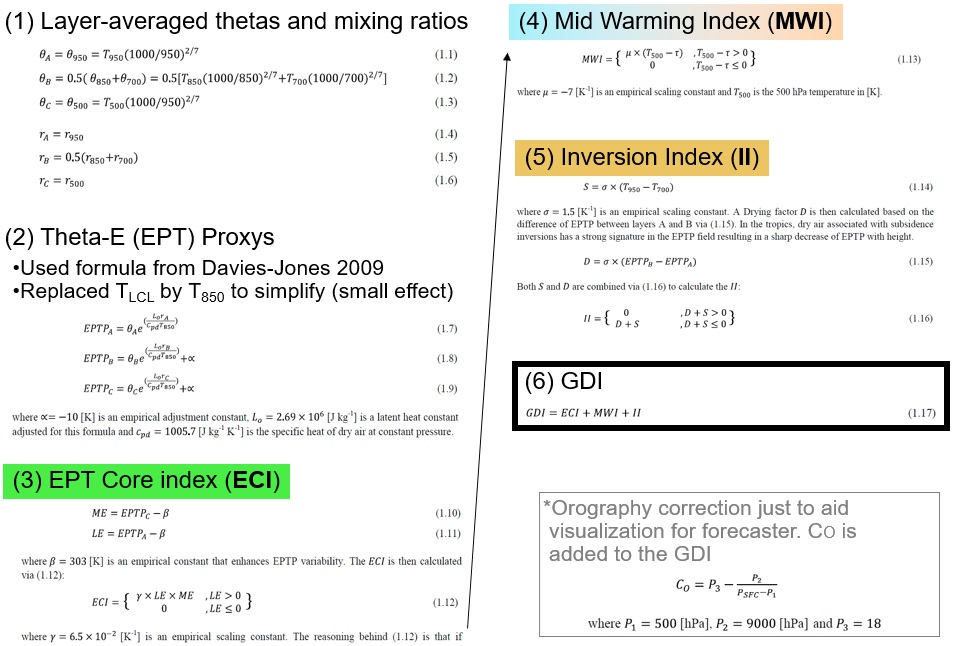
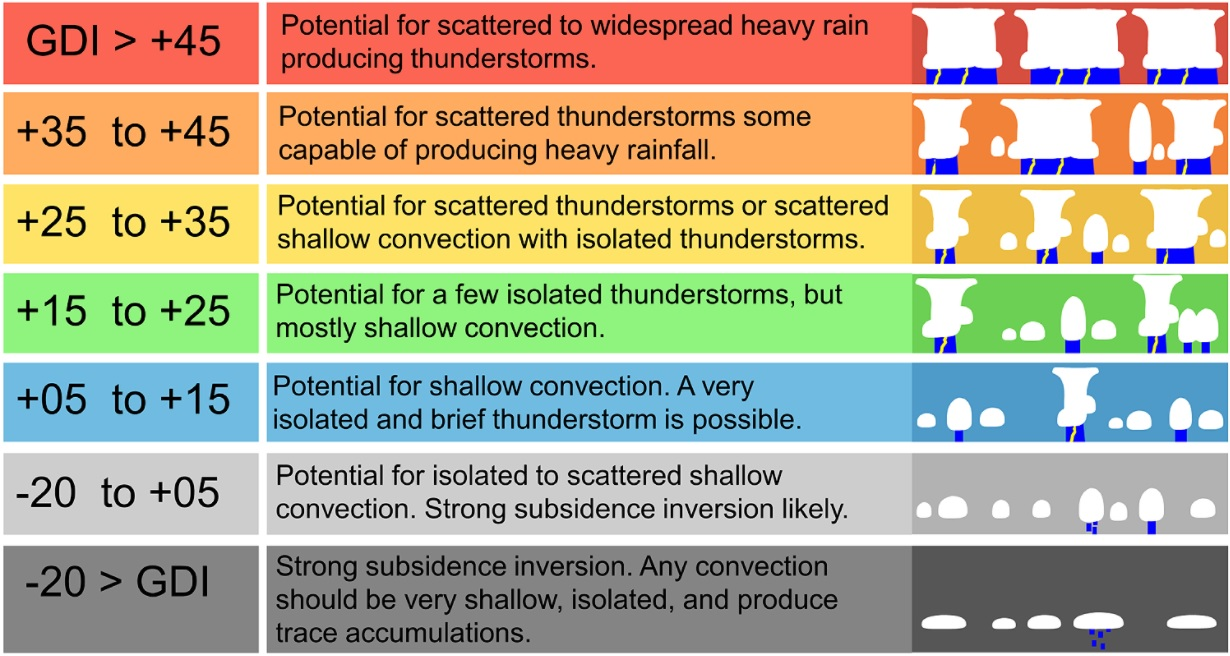

In [ ]:
#-----------------------------------------------------------------------------------------------------------
# INPE / CPTEC Training: NWF Data Processing With Python - Script 11: Galvez Davison Index  
#-----------------------------------------------------------------------------------------------------------
from datetime import datetime              # Basic Dates and time types
import pygrib                              # Provides a high-level interface to the ECWMF ECCODES C library for reading GRIB files
import time as t                           # Time access and conversion
import matplotlib.pyplot as plt            # Plotting library
import cartopy, cartopy.crs as ccrs        # Plot maps
import cartopy.io.shapereader as shpreader # Import shapefiles
import numpy as np                         # Scientific computing with Python
import matplotlib
import math                                # Import math
#----------------------------------------------------------------------------------------------------------- 

# Read the GRIB file
grib = pygrib.open("Output/gfs.t00z.pgrb2.0p50.f000")
 
# Read the surface pressure
sfcps = grib.select(name='Surface pressure')[0]

# Get some information    
init  = str(sfcps.analDate)      # Init date / time
print('Init: ' + init + ' UTC')
run   = str(sfcps.hour).zfill(2) # Run
print('Run: ' + run + 'Z')
ftime = str(sfcps.forecastTime)  # Forecast hour
print('Forecast: +' + ftime)
valid = str(sfcps.validDate)     # Valid date / time 
print('Valid: ' + valid + ' UTC')

# Select the extent
extent = [-93.0, -60.00, -25.00, 18.00]

# Read the data for a specific region
sfcps, lats, lons = sfcps.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

# Convert the surface pressure to hectopascal
sfcps = sfcps / 100
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 950 hPa
temp950 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
temp950 = temp950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Calculate the theta
T950 = ((temp950)*(pow((1000/950),(2/7))))
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 950 hPa
spfh950 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 950)[0]

# Read the data for a specific region
R950 = spfh950.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 850 hPa
temp850 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
temp850 = temp850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Calculate the theta
T850 = ((temp850)*(pow((1000/850),(2/7))))
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 850 hPa
spfh850 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 850)[0]

# Read the data for a specific region
R850 = spfh850.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 700 hPa
temp700 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
temp700 = temp700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Calculate the theta
T700 = ((temp850)*(pow((1000/700),(2/7))))
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 700 hPa
spfh700 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 700)[0]

# Read the data for a specific region
R700 = spfh700.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]
#-----------------------------------------------------------------------------------------------------------
# Read the temperature in 500 hPa
temp500 = grib.select(name='Temperature', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
temp500 = temp500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

# Calculate the theta
T500 = ((temp500)*(pow((1000/500),(2/7))))
#-----------------------------------------------------------------------------------------------------------
# Read the specific humidity in 500 hPa
spfh500 = grib.select(name='Specific humidity', typeOfLevel = 'isobaricInhPa', level = 500)[0]

# Read the data for a specific region
R500 = spfh500.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)[0]

#-----------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Layer-averaged thetas and mixing ratios
THETAA = T950
A1 = T850 + T700
THETAB = 0.5 * A1
THETAC = T500
RA = R950
C2 = R850 + R700
RB = 0.5 * C2
RC = R500

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Theta-E (EPT) Proxys 
L0 = 2690000
alpha = -10
cpd = 1005.7
p1 = L0 * RA
p2 = L0 * RB
p3 = L0 * RC
p4 = cpd * T850
x1 = p1 / p4
x2 = p2 / p4
x3 = p3 / p4 
y1 = np.exp(x1)
y2 = np.exp(x2)
y3 = np.exp(x3)
EPTPA = THETAA * y1
EPTPB = THETAB * y2 + alpha
EPTPC = THETAC * y3 + alpha

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the EPT Core Index (ECI)
beta = 303
ME = EPTPC - beta
LE = EPTPA - beta
gamma= 0.065

# Decide the value of the ECI
ECI = np.where(LE <= 0, 0, gamma * LE * ME)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Mid Warming Index (MWI)
tau = 263.15
mu = -7
calc1 = temp500 - tau

# Decide the value of the MWI
MWI = np.where(calc1 <= 0, 0, calc1 * mu)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Calculate the Inversion Index (II)
sigma = 1.5
op1 = temp950 - temp700
S = sigma * op1
op2 = EPTPB - EPTPA
D = sigma * op2
calc2 = D + S

# Decide the value of the II
II = np.where(calc2 <= 0, D + S, 0)

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Orography correction just to aid visualization for forecaster. Co is added to the GDI
pp1 = 500
pp2 = 9000
pp3 = 18
divisor = sfcps - pp1
division = pp2 / divisor
C0 = pp3 - division

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

# Galvez Davison Index - Indices with and without correction
GDI = ECI + MWI + II
GDIc = ECI + MWI + II + C0

# To smooth the contours
import scipy.ndimage
GDIc = scipy.ndimage.zoom(GDIc, 3)
lats = scipy.ndimage.zoom(lats, 3)
lons = scipy.ndimage.zoom(lons, 3)

#-----------------------------------------------------------------------------------------------------------

# Choose the plot size (width x height, in inches)
plt.figure(figsize=(13,13))

# Use the Cilindrical Equidistant projection in cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# Add a shapefile
# https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
shapefile = list(shpreader.Reader('BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# Add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Define de contour interval
data_min = -30 
data_max = 70 
interval = 5
levels = np.arange(data_min,data_max,interval)

# Create the color scale 
colors = ["#323232", "#646464", "#737373", "#7e7e7e", "#909090", "#a3a3a3", "#b1b1b1", "#bcbcbc", "#bbc7cb", "#b2d2dd", "#90d5bb", "#55d065", "#5acf28", "#bad411", "#ffcc00", "#ffa900", "#fc8106", "#eb4722", "#d8133a", "#ac0a1d"]
cmap = matplotlib.colors.ListedColormap(colors)
cmap.set_over('#800000')
cmap.set_under('#000000')

# Plot the contours
img1 = ax.contourf(lons, lats, GDIc, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')    
img2 = ax.contour(lons, lats, GDIc, transform=ccrs.PlateCarree(), colors='white', linewidths=0.3, levels=levels)
ax.clabel(img2, inline=1, inline_spacing=0, fontsize='10',fmt = '%1.0f', colors= 'black')

# Add a colorbar
plt.colorbar(img1, label='2 m Temperature (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# Add a title
plt.title('GFS: Galvez Davison Index (GDI)' , fontweight='bold', fontsize=10, loc='left')
plt.title('Valid: ' + valid, fontsize=10, loc='right')
#----------------------------------------------------------------------------------------------------------- 
# Save the image
plt.savefig('image_11.png')

# Show the image
plt.show()